In [ ]:
import numpy as np

**LEVENSHTEIN DISTANCE FUNCTION**

In [ ]:
def editDistance(s1, s2):
    if len(s1) > len(s2):
        s1, s2 = s2, s1
    distances = range(len(s1) + 1)
    for i2, c2 in enumerate(s2):
        distances_ = [i2+1]
        for i1, c1 in enumerate(s1):
            if c1 == c2:
                distances_.append(distances[i1])
            else:
                distances_.append(1 + min((distances[i1], distances[i1 + 1], distances_[-1])))
        distances = distances_
    return distances[-1]

def distance(s1,s2):
    if len(s1) < len(s2):
        return distance(s2, s1)

    # len(s1) >= len(s2)
    if len(s2) == 0:
        return len(s1)

    previous_row = range(len(s2) + 1)
    for i, c1 in enumerate(s1):
        current_row = [i + 1]
        for j, c2 in enumerate(s2):
            insertions = previous_row[j + 1] + 1 # j+1 instead of j since previousrow and currentrow are one character longer
            deletions = current_row[j] + 1       # than s2
            substitutions = previous_row[j] + (c1 != c2)
            current_row.append(min(insertions, deletions, substitutions))
        previous_row = current_row

    return previous_row[-1]

In [ ]:
from google.colab import files
files.upload()

**DENDOGRAM**

/usr/local/lib/python3.6/dist-packages/scipy/cluster/hierarchy.py:830: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', metric='euclidean')
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 13 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 13 missing from current font.
  font.set_text(s, 0, flags=flags)


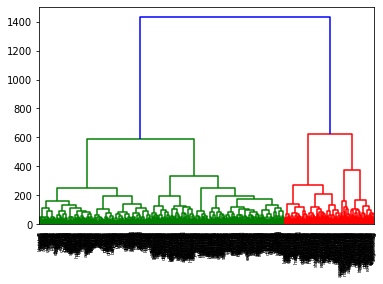

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import sys
import codecs
from scipy.cluster.hierarchy import linkage, dendrogram,fcluster,ward 

sim_list = []
sim_matrix = []
data_list = [line.rstrip('\n') for line in codecs.open('assignment-3_dataset.txt', "r", "utf-8")]#Unicode Transformation Format
data_list = [line.split('   ') for line in data_list]
words = np.asarray(data_list)
len_list = len(data_list)
label_list = [data_list[l][-1] for l in range(0,len(data_list)-1)]
text_list = [data_list[l][0] for l in range(0,len(data_list)-1)] 

for i in range(0, len_list-1):
    pivot = text_list[i]
    for j in range(0, len_list-1):
      sim = distance(pivot, text_list[j]) # calcurate similarity(distance)
      sim_list.append(sim)
      if j == len_list-2:
        sim_matrix.append(sim_list)
        sim_list = []
linkage_matrix=ward(sim_matrix)
dendrogram(linkage_matrix, labels=label_list)
plt.show()


In [ ]:
from sklearn.cluster import  AgglomerativeClustering
nos_of_clusters=[]
threshold=np.arange(0,30,5)
for s in threshold:
  clustering=AgglomerativeClustering(n_clusters=None, affinity='euclidean', memory=None, connectivity=None, compute_full_tree='true', linkage='ward', distance_threshold=s)
  z=clustering.fit_predict(sim_matrix)
  nos_of_clusters.append(np.max(z))

**NO OF CLUSTERS VS THRESHOLD GRAPH**

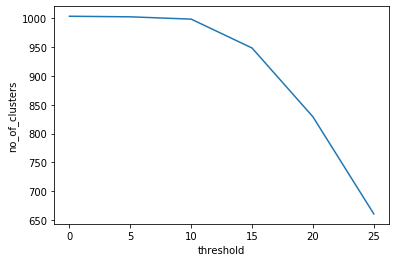

In [ ]:
plt.plot(threshold,nos_of_clusters)
plt.xlabel('threshold')
plt.ylabel('no_of_clusters')
plt.show()


**TOTAL NO OF CLUSTERS IS 949 at distance 15**




In [ ]:
largestgap=np.argmin(np.diff(nos_of_clusters))
clusters=largestgap+1
print(nos_of_clusters[clusters])

949


**LENGTH OF EACH CLUSTER AND ROOT WORD OF EACH CLUSTER**

In [ ]:
from sklearn.cluster import  AgglomerativeClustering
clustering = AgglomerativeClustering(n_clusters=949)
cluster=clustering.fit(sim_matrix)
finalcluster=[]
clust=[]
rootword=[]
for i in range(949):
        clust0=np.unique(words[np.where(cluster.labels_==i)])
        mini0=10000
        temp0=[]
        for w in clust0:
          if len(w)<mini0:
            mini0=len(w)
            temp0.append(w)
        k=len(temp0)
      #print stem words for cluster 0
        print("stem word for the cluster",i, "is : ",temp0[k-1])
        print("lenght of cluster ",i,"is:",len(clust0))
        finalcluster.append(clust0)
        clust0=[]

/usr/local/lib/python3.6/dist-packages/scipy/cluster/hierarchy.py:830: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', metric='euclidean')


stem word for the cluster 0 is :  ne
lenght of cluster  0 is: 3
stem word for the cluster 1 is :  yielded
lenght of cluster  1 is: 2
stem word for the cluster 2 is :  ciitzens
lenght of cluster  2 is: 2
stem word for the cluster 3 is :  neaf
lenght of cluster  3 is: 2
stem word for the cluster 4 is :  kiss
lenght of cluster  4 is: 2
stem word for the cluster 5 is :  cheered
lenght of cluster  5 is: 2
stem word for the cluster 6 is :  bail
lenght of cluster  6 is: 2
stem word for the cluster 7 is :  importance
lenght of cluster  7 is: 2
stem word for the cluster 8 is :  raining
lenght of cluster  8 is: 2
stem word for the cluster 9 is :  die
lenght of cluster  9 is: 2
stem word for the cluster 10 is :  laboured
lenght of cluster  10 is: 2
stem word for the cluster 11 is :  shake
lenght of cluster  11 is: 3
stem word for the cluster 12 is :  deeds
lenght of cluster  12 is: 2
stem word for the cluster 13 is :  allots
lenght of cluster  13 is: 2
stem word for the cluster 14 is :  entertain

**PORTER STMMER**

In [ ]:
with open('assignment-3_dataset.txt', 'r') as f:
    label_list=f.readlines()[:-1]

In [ ]:
import nltk
from nltk.stem.porter import PorterStemmer 
porter_list=[]
for w in label_list:
    ps = PorterStemmer()
    porter_list.append(ps.stem(w.strip()))

In [ ]:
i=0 
for w in label_list[:20]:
    print(w.strip(), " : ", porter_list[i])
    i=i+1

accidence  :  accid
accident  :  accid
accidental  :  accident
accidentally  :  accident
accidents  :  accid
accite  :  accit
accited  :  accit
accites  :  accit
acclamations  :  acclam
accommodate  :  accommod
accommodated  :  accommod
accommodation  :  accommod
accommodations  :  accommod
accommodo  :  accommodo
accompanied  :  accompani
accompany  :  accompani
accompanying  :  accompani
accomplices  :  accomplic
accomplish  :  accomplish
accomplished  :  accomplish
